## Scraping Popular Movies on https://www.themoviedb.org/movie

**TODO(Intro)**

- Web scraping refers to the extraction of data from a website.
- The url contains some popular movies .Our job is to extract some useful information about each movie.
- Tools I will be using are (Python , requests , BeautifulSoup , Pandas)


**Here are the steps we are going to follow:**

- First we are going to scrape https://www.themoviedb.org/movie.
- We will get a list of movies and there urls .
- For each movie we'll grap movie name,user score,duration,date of release,genre,overview,director(s).
- At last we will create a csv file format .


In [24]:
# Importing the libraries
import requests 
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

We are going to create 2 classes to :
- In the 1st class we scrape the home page and return the movie's link .
- The 2nd class is going to take the link further scrape the required information.

The titles and links are in the a tag .

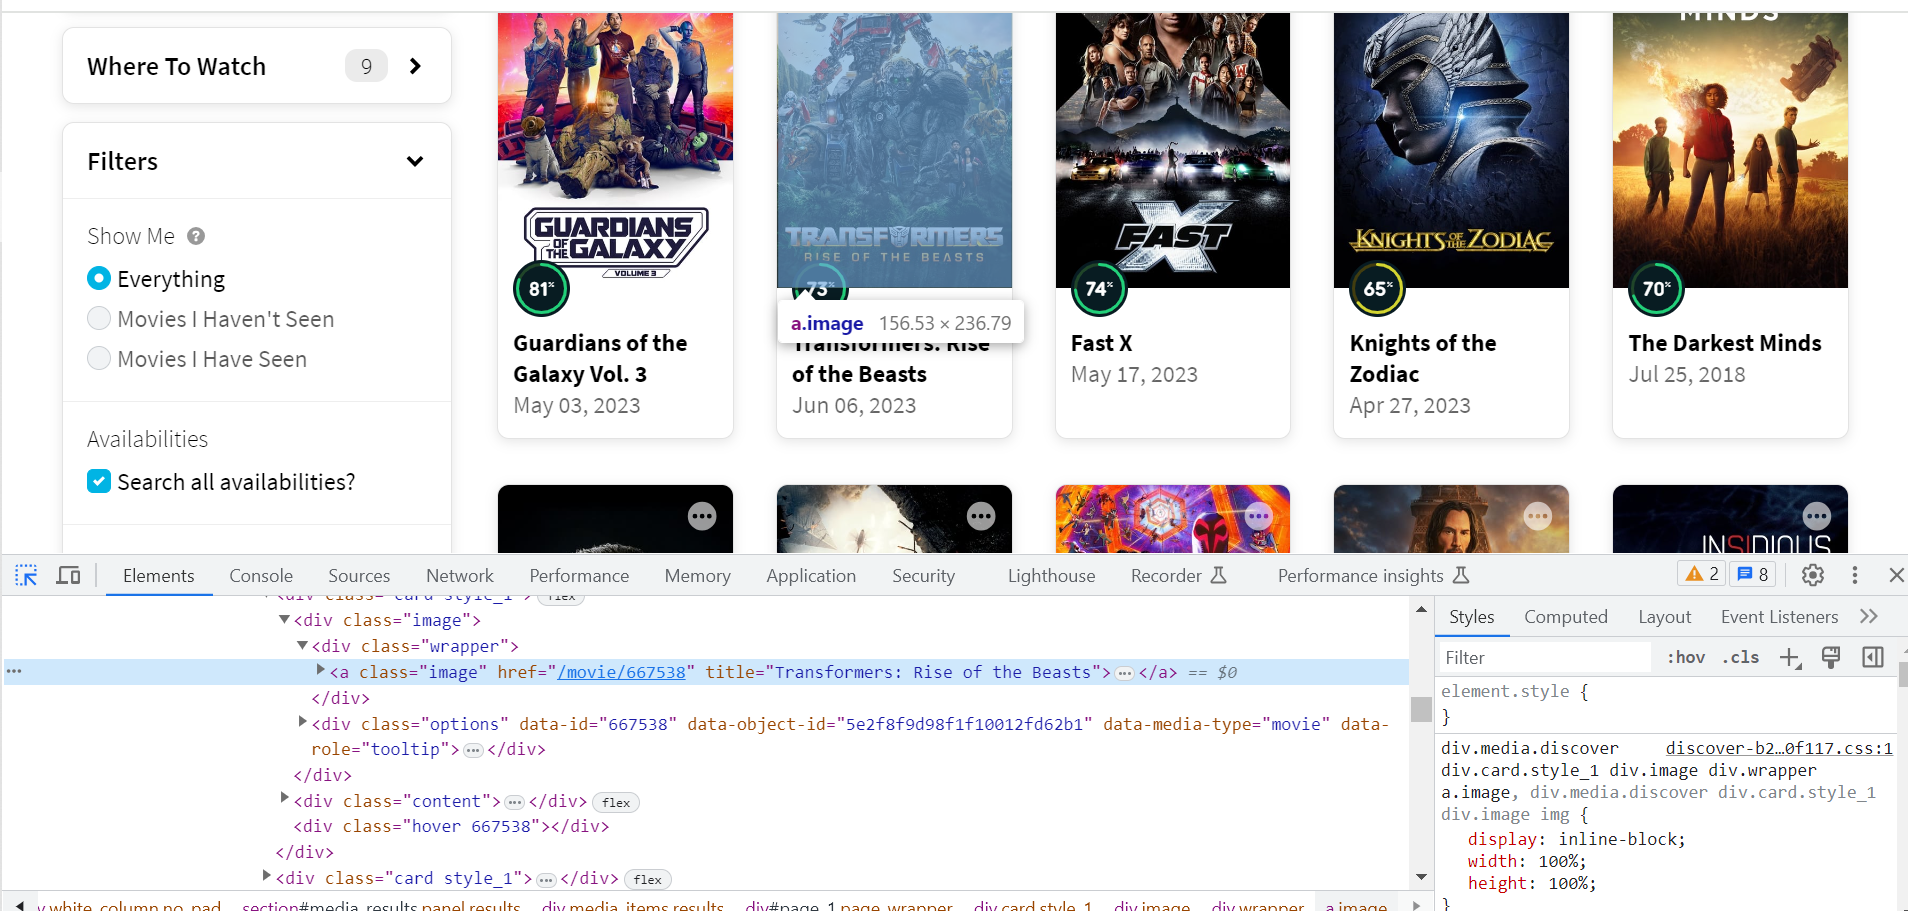

In [6]:
class ExtractHomePage():
    def __init__(self,url):
        # Accepts the url for the home page
        self.base_url = url
        
        HEADERS = {
            'User-Agent': 'Mozilla/5.0 (iPad; CPU OS 12_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148'
        }
        # Downloading the Page 
        response = requests.get(self.base_url, headers=HEADERS)
        
        # Checking if the status code is 200
        self.check_status_code(response)
        # Parse using BeautifulSoup
        self.contents = BeautifulSoup(response.text,'html.parser')
        
        
    def check_status_code(self,res):
        if res.status_code != 200:
            raise Exception(f'Unable to open {self.base_url}')  
        else:
            print('Got NO ERROR while SCRAPING\n')
            
            
    # Returns a list which contains the movie's name         
    def return_movies_name(self):
        class_selection = 'image'

        all_movies_contents = self.contents.find_all('a',class_=class_selection)
        
        movies_name = []
        for i in range(len(all_movies_contents)):
            movies_name.append(all_movies_contents[i]['title'])
            
        return movies_name
    
    
    # Returns a list which contains the movie's link    
    def return_movies_link(self):
        class_selection = 'image'

        all_movies_contents = self.contents.find_all('a',class_=class_selection)
        
        movies_link = []
        for i in range(len(all_movies_contents)):
            url = 'https://www.themoviedb.org'
            temp_url = (url + all_movies_contents[i]['href'])
            movies_link.append(temp_url)
            
        return movies_link
    

In [7]:
home_page = ExtractHomePage('https://www.themoviedb.org/movie')

Got NO ERROR while SCRAPING



In [10]:
movies_link = home_page.return_movies_link()
movies_link

['https://www.themoviedb.org/movie/667538',
 'https://www.themoviedb.org/movie/447365',
 'https://www.themoviedb.org/movie/385687',
 'https://www.themoviedb.org/movie/455476',
 'https://www.themoviedb.org/movie/678512',
 'https://www.themoviedb.org/movie/254128',
 'https://www.themoviedb.org/movie/569094',
 'https://www.themoviedb.org/movie/445651',
 'https://www.themoviedb.org/movie/502356',
 'https://www.themoviedb.org/movie/603692',
 'https://www.themoviedb.org/movie/346698',
 'https://www.themoviedb.org/movie/1130818',
 'https://www.themoviedb.org/movie/406563',
 'https://www.themoviedb.org/movie/575264',
 'https://www.themoviedb.org/movie/976573',
 'https://www.themoviedb.org/movie/921636',
 'https://www.themoviedb.org/movie/47964',
 'https://www.themoviedb.org/movie/1070802',
 'https://www.themoviedb.org/movie/1010581',
 'https://www.themoviedb.org/movie/423108']

In [11]:
movies_name = home_page.return_movies_name()
movies_name

['Transformers: Rise of the Beasts',
 'Guardians of the Galaxy Vol. 3',
 'Fast X',
 'Knights of the Zodiac',
 'Sound of Freedom',
 'San Andreas',
 'Spider-Man: Across the Spider-Verse',
 'The Darkest Minds',
 'The Super Mario Bros. Movie',
 'John Wick: Chapter 4',
 'Barbie',
 'Sheroes',
 'Insidious: The Last Key',
 'Mission: Impossible - Dead Reckoning Part One',
 'Elemental',
 'The Out-Laws',
 'A Good Day to Die Hard',
 'Confidential Informant',
 'My Fault',
 'The Conjuring: The Devil Made Me Do It']

In [25]:
class EachMovieInformation():
    # Accepts the link returned by the above class
    def __init__(self,url,name):
        self.base_url = url
        
        HEADERS = {
            'User-Agent': 'Mozilla/5.0 (iPad; CPU OS 12_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148'
        }
        # Downloading the Page
        response = requests.get(self.base_url, headers=HEADERS)
        
        # Checking if the status code is 200
        self.check_status_code(response)
        
        # Parse using BeautifulSoup
        self.movie_contents = BeautifulSoup(response.text,'html.parser')
        print('Scrapping Information for {} \n'.format(name))
        
        
    def check_status_code(self,res):
        if res.status_code != 200:
            raise Exception(f'Unable to open {self.base_url}')
            
    # Return the user score
    def get_user_score(self):
        try:
            
            class_selection1 = 'user_score_chart'
            user_score_tag = self.movie_contents.find_all('div',{'class':class_selection1})
            user_score = user_score_tag[0]['data-percent']
        except:
            return np.nan
        else:
            return user_score
                                                  
    # Returns Time or Duration of the movie  
    def get_time(self):   
        try:
            time_tag = self.movie_contents.find_all('span',class_='runtime')
            time = time_tag[0].text.strip()
            
        except:
            return np.nan
        else:
            return time
    
    # Returns the Release Date
    def get_release_date(self):
        try:
            release_tag = self.movie_contents.find_all('span',class_='release')
            release = release_tag[0].text.strip()                                  
            release = release[:10]
        except:
            return np.nan
        else:
            return release
    
    # Return all the genres in the form of string separated by ','
    def get_genres(self):
        try:
            genres_tag = self.movie_contents.find_all('span',class_='genres')
            genres = genres_tag[0].text.strip()                                    
            genres  = ' , '.join(genres.split(',\xa0'))
            
        except:
            return np.nan
        else:
            return genres
    
    # Returns the overview (Paragraph)
    def get_overview(self):
        try:
            overview_tag = self.movie_contents.find_all('div',class_ = 'overview')

            overview = overview_tag[0].text.strip()
        except:
            return np.nan
        else:
            return overview
        
    # Returns the name(s) of Director    
    def get_directors(self):
        try:
            directors_tag = self.movie_contents.find_all('li',class_='profile')

            director = []
            for i in directors_tag:
                temp_p_tag = i.find('p',class_ = 'character')
                temp_a_tag = i.find('a')

                if ('Director' in temp_p_tag.text):
                    director.append(temp_a_tag.text)

            director = ','.join(director)
            
        except:
            return np.nan   
        else:
            return director
    

In [13]:
movie_info = EachMovieInformation(movies_link[0],movies_name[0])

Scrapping Information for Transformers: Rise of the Beasts 



In [14]:
movie_info.get_genres()

'Action , Adventure , Science Fiction'

In [15]:
movie_info.get_directors()

'Steven Caple Jr.'

In [16]:
movie_info.get_overview()

'When a new threat capable of destroying the entire planet emerges, Optimus Prime and the Autobots must team up with a powerful faction known as the Maximals. With the fate of humanity hanging in the balance, humans Noah and Elena will do whatever it takes to help the Transformers as they engage in the ultimate battle to save Earth.'

In [17]:
movie_info.get_release_date()

'06/09/2023'

In [18]:
movie_info.get_time()

'2h 7m'

In [19]:
movie_info.get_user_score()

'73.0'

In [30]:
# This function creates a DataFrame and saves it.
# All of the parameters should be list

def create_df_and_save_it(movies_name , Name_of_df , movies_directors,
                          movies_time , movies_score , movies_overview ,
                          movies_release , movies_genre):
    
    dic = {
        'Movie_Name':movies_name,
        'User_Score(%)':movies_score,
        'Time':movies_time,
        'Date of Release':movies_release,
        'Genres':movies_genre,
        'Director':movies_directors,
        'Overview':movies_overview
    }
    
    
    df = pd.DataFrame(dic,index=list(range(len(movies_genre))))
    
    df.to_csv(Name_of_df+'.csv',index=False)
    
    
    print('DONE SUCCESSFULLY')
                          

**The below code is for scraping only the Home Page and their movies.**

In [31]:
movies_directors  = [] 
movies_time = []
movies_score = [] 
movies_overview = [] 
movies_release  = []
movies_genre = []

Name_of_csv_file = 'Movies'
url = 'https://www.themoviedb.org/movie?page=4'
home_page = ExtractHomePage(url)

movies_link = home_page.return_movies_link()
movies_name = home_page.return_movies_name() 


for i in range(len(movies_link)):
    movie_info = EachMovieInformation(movies_link[i],movies_name[i])
    
    movies_directors.append(movie_info.get_directors())
    
    movies_genre.append(movie_info.get_genres())
    
    movies_time.append(movie_info.get_time())
    
    movies_score.append(movie_info.get_user_score())
    
    movies_release.append(movie_info.get_release_date())
    
    movies_overview.append(movie_info.get_overview())
    
    
    
    
create_df_and_save_it(movies_name=movies_name , Name_of_df=Name_of_csv_file , movies_directors=movies_directors,
                     movies_genre=movies_genre , movies_release=movies_release , movies_overview=movies_overview,
                     movies_time=movies_time , movies_score=movies_score )

Got NO ERROR while SCRAPING

Scrapping Information for Black Clover: Sword of the Wizard King 

Scrapping Information for Spider-Man: Into the Spider-Verse 

Scrapping Information for Los bastardos 

Scrapping Information for Spider-Man: No Way Home 

Scrapping Information for PAW Patrol: The Movie 

Scrapping Information for Scream VI 

Scrapping Information for Ghosted 

Scrapping Information for It 

Scrapping Information for No Hard Feelings 

Scrapping Information for Gold Brick 

Scrapping Information for Garfield 

Scrapping Information for Accident Man: Hitman's Holiday 

Scrapping Information for Black Panther: Wakanda Forever 

Scrapping Information for Scooby-Doo! and the Witch's Ghost 

Scrapping Information for The Angry Black Girl and Her Monster 

Scrapping Information for Suzume 

Scrapping Information for Sword Art Online the Movie -Progressive- Scherzo of Deep Night 

Scrapping Information for The Mount 2 

Scrapping Information for To Catch a Killer 

Scrapping Infor

**If you want to scrape more Pages see Below**

In [37]:
movies_directors  = [] 
movies_time = []
movies_score = [] 
movies_overview = [] 
movies_release  = []
movies_genre = []

Name_of_csv_file = 'Movies_4'

how_many_pages = 2
previous = []

for i in range(1,how_many_pages+1):
    
    url = f'https://www.themoviedb.org/movie?page={i}'
    home_page = ExtractHomePage(url)

    movies_link = home_page.return_movies_link()
    movies_name = home_page.return_movies_name() 
    previous += movies_name 

    for i in range(len(movies_link)):
        movie_info = EachMovieInformation(movies_link[i],movies_name[i])

        movies_directors.append(movie_info.get_directors())

        movies_genre.append(movie_info.get_genres())

        movies_time.append(movie_info.get_time())

        movies_score.append(movie_info.get_time())

        movies_release.append(movie_info.get_release_date())

        movies_overview.append(movie_info.get_overview())

    
    
    
create_df_and_save_it(movies_name=previous , Name_of_df=Name_of_csv_file , movies_directors=movies_directors,
                     movies_genre=movies_genre , movies_release=movies_release , movies_overview=movies_overview,
                     movies_time=movies_time , movies_score=movies_score )

Got NO ERROR while SCRAPING

Scrapping Information for Transformers: Rise of the Beasts 

Scrapping Information for Guardians of the Galaxy Vol. 3 

Scrapping Information for Fast X 

Scrapping Information for Knights of the Zodiac 

Scrapping Information for Sound of Freedom 

Scrapping Information for San Andreas 

Scrapping Information for Spider-Man: Across the Spider-Verse 

Scrapping Information for The Darkest Minds 

Scrapping Information for The Super Mario Bros. Movie 

Scrapping Information for John Wick: Chapter 4 

Scrapping Information for Barbie 

Scrapping Information for Sheroes 

Scrapping Information for Insidious: The Last Key 

Scrapping Information for Mission: Impossible - Dead Reckoning Part One 

Scrapping Information for Elemental 

Scrapping Information for The Out-Laws 

Scrapping Information for A Good Day to Die Hard 

Scrapping Information for Confidential Informant 

Scrapping Information for My Fault 

Scrapping Information for The Conjuring: The Devil 